# Import vars from pickle

In [1]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'/home/shin/lab/00_project/SARIMAX/pickles/20240922-091947/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
# loaded_sarimax_model = data['sarimax_model']
loaded_start_test_date = data['start_test_date']
loaded_end_test_date = data['end_test_date']
# loaded_pd_exog_data_test = data['pd_exog_data_test']
# loaded_exo_data = data['exo_data']
# loaded_predict_value = data['predict_value']
loaded_predict_timeline_list = data['predict_timeline_list']
loaded_predict_value_list = data['predict_value_list']
loaded_all_concated = data['all_concated']
loaded_best_param_arima = data['best_param_arima']  
loaded_best_param_seasonal = data['best_param_seasonal']  
# loaded_train_days = data['train_days']  

In [2]:
# マイナスの値をゼロに書き換える
loaded_predict_value_list = [0 if x < 0 else x for x in loaded_predict_value_list]

print(loaded_predict_value_list)

[849.3017780724442, 850.753766039818, 853.1141539257412, 862.342304101835, 862.7908282126125, 819.4785748089689, 785.187361683649, 755.5547350182154, 721.5266769725392, 662.1530343569557, 628.6515679486683, 651.5461468966964, 663.3252001929968, 677.6908199624418, 711.7855163239976, 711.7538631755087, 730.7928577680065, 773.0117548759675, 813.6399780798199, 840.858751469812, 834.7324515462069, 856.3043665663415, 853.1816029703973, 864.4477364285765, 880.3422437558197, 890.086153899415, 897.1488393729691, 879.304272448563, 865.5833547095468, 852.5502275038513, 814.5830773162053, 774.1088738084325, 740.011265016658, 682.6366228399438, 652.3050817697657, 647.2330584367461, 657.7584007009814, 655.8124626556403, 658.1626048635001, 676.4562161117269, 708.0641857612433, 739.3014044408602, 750.9767790452572, 787.1012582811518, 833.1005459062857, 877.4606724394623, 871.7692231543805, 865.5533771911458, 875.037665334508, 889.0133481876104, 908.762771521721, 897.6284862672007, 874.2613821382022, 8

# Set date

In [3]:
from datetime import datetime

train_start_date    = '2018-04-01 00:00:00'
train_end_date      = '2018-06-30 23:59:59'
test_start_date     = '2018-07-01 00:00:00'
test_end_date       = '2018-07-11 22:59:59'

train_st = datetime.strptime(train_start_date, '%Y-%m-%d %H:%M:%S')
train_en = datetime.strptime(train_end_date, '%Y-%m-%d %H:%M:%S')
test_st = datetime.strptime(test_start_date, '%Y-%m-%d %H:%M:%S')
test_en = datetime.strptime(test_end_date, '%Y-%m-%d %H:%M:%S')

train_pop = loaded_all_concated[train_st:train_en]['pop_hours']
test_pop  = loaded_all_concated[test_st:test_en]['pop_hours']

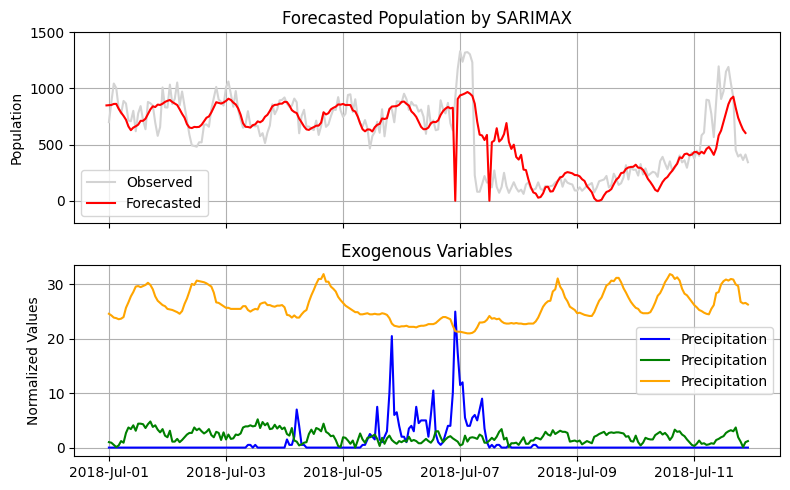

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 2つのグラフを作成 (2行1列)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5),sharex=True)

# 上のグラフ
ax1.plot(loaded_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax1.plot(loaded_predict_timeline_list, loaded_predict_value_list, label='Forecasted',color='red')
ax1.set_ylim(-200, 1500)
ax1.set_title('Forecasted Population by SARIMAX')
ax1.set_ylabel('Population')
ax1.grid()
ax1.legend()

# 下のグラフ
ax2.plot(loaded_all_concated[test_st:test_en]['y_precipitation'], label='Precipitation', color='blue')
ax2.plot(loaded_all_concated[test_st:test_en]['y_windspeed'], label='Precipitation', color='green')
ax2.plot(loaded_all_concated[test_st:test_en]['y_temperature'], label='Precipitation', color='orange')
ax2.set_title('Exogenous Variables')
ax2.set_ylabel('Normalized Values')
ax2.grid()
ax2.legend()


# フォーマットを月単位に設定
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax2.xaxis.set_major_formatter(formatter)

# x軸のラベルを縦向きに回転
# ax2.tick_params(axis='x', rotation=90)

# 両方のグラフに共通のx軸ラベル
# fig.supxlabel('Date')

# グラフの表示
plt.tight_layout()  # レイアウトを自動調整
plt.show()

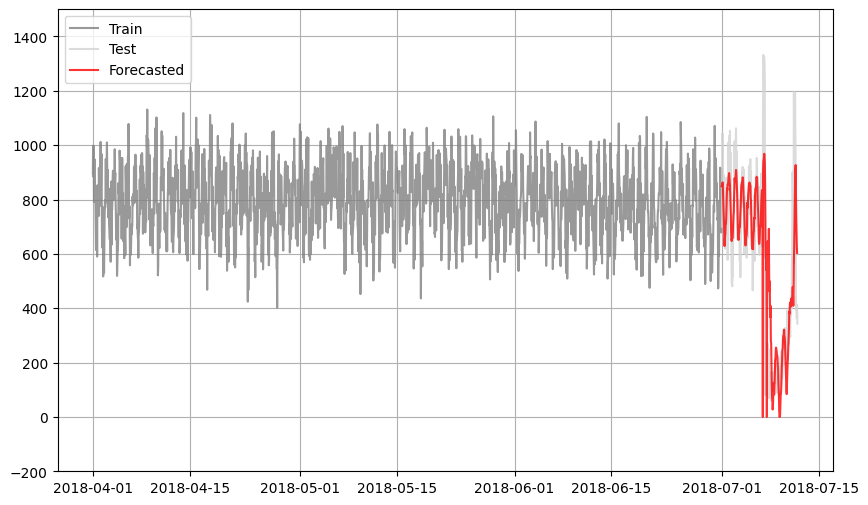

In [9]:
import matplotlib.pyplot as plt
alpha=0.8

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 6))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(train_pop, label='Train',color='gray',alpha=alpha)
ax.plot(test_pop, label='Test',color='lightgray',alpha=alpha)
ax.plot(loaded_predict_timeline_list, loaded_predict_value_list, label='Forecasted',color='red',alpha=alpha)


# y軸の範囲を設定
ax.set_ylim(-200, 1500)

# 凡例を表示
ax.legend()
ax.grid()

# グラフを表示
plt.show()

In [6]:
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  # print(f'Each diff ratio on each hour: {absolute_diff_percentage}')
  sum_abs_diff = sum(absolute_diff_percentage)
  # print()
  # print(f'SUM: {sum_abs_diff}')

  mape = (sum_abs_diff / len(predict))*100 #パーセント表記
  print(f'MAPE : {mape:.1f}%')
  #mape は GroudTruth を基準にしたときの予測値のずれの比率について，全データを計算したときの，データ1つあたりの平均

In [7]:
Mape_val=Mape(loaded_predict_value_list,test_pop)
# MAPE : 0.2195586694066084

MAPE : 53.4%


In [8]:
loaded_predict_value_list                   

[849.3017780724442,
 850.753766039818,
 853.1141539257412,
 862.342304101835,
 862.7908282126125,
 819.4785748089689,
 785.187361683649,
 755.5547350182154,
 721.5266769725392,
 662.1530343569557,
 628.6515679486683,
 651.5461468966964,
 663.3252001929968,
 677.6908199624418,
 711.7855163239976,
 711.7538631755087,
 730.7928577680065,
 773.0117548759675,
 813.6399780798199,
 840.858751469812,
 834.7324515462069,
 856.3043665663415,
 853.1816029703973,
 864.4477364285765,
 880.3422437558197,
 890.086153899415,
 897.1488393729691,
 879.304272448563,
 865.5833547095468,
 852.5502275038513,
 814.5830773162053,
 774.1088738084325,
 740.011265016658,
 682.6366228399438,
 652.3050817697657,
 647.2330584367461,
 657.7584007009814,
 655.8124626556403,
 658.1626048635001,
 676.4562161117269,
 708.0641857612433,
 739.3014044408602,
 750.9767790452572,
 787.1012582811518,
 833.1005459062857,
 877.4606724394623,
 871.7692231543805,
 865.5533771911458,
 875.037665334508,
 889.0133481876104,
 908.762